# 📊 Netflix Movies & TV Shows Data Analysis

## 1. Project Overview
In this project, we analyze the Netflix Movies & TV Shows dataset from Kaggle.  
Goals:  
- Perform **Exploratory Data Analysis (EDA)** using Python (Pandas, NumPy, Seaborn, Matplotlib).  
- Run **SQL queries** on the dataset using SQLite/PostgreSQL.  
- Generate visual insights from the data.

## 2. Import Libraries
We will use the following libraries:
- **NumPy, Pandas** → data handling
- **Matplotlib, Seaborn** → visualization
- **SQLite3 / SQLAlchemy** → SQL queries inside Python  

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")

## 3. Load Dataset
- Load the dataset into a Pandas DataFrame.  
- Display the first 5 rows.  
- Print dataset shape & info.  

In [35]:
df=pd.read_csv("netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [36]:
df.shape

(8807, 12)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [38]:
df.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

## 4. Data Cleaning & Preprocessing
Steps:
- Handle missing values (`isnull().sum()`).  
- Check for duplicate rows.  
- Convert date fields (e.g., `date_added`) to datetime.  
- Standardize categorical columns if needed. 

In [39]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [41]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicates if any
df = df.drop_duplicates()

Number of duplicate rows: 0


In [42]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Extract year & month for analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [43]:
# 4. Standardize categorical columns
# Strip extra spaces and convert to consistent case
df['type'] = df['type'].str.strip().str.title()   # Movie / Tv Show
df['country'] = df['country'].str.strip()

# Optional: fill missing categorical values with "Unknown"
df['country'].fillna("Unknown", inplace=True)
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)


In [44]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           4
duration         3
listed_in        0
description      0
year_added      98
month_added     98
dtype: int64

In [45]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,Tv Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,Tv Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,Tv Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,Tv Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


## 5. Exploratory Data Analysis (EDA)
Key Questions to Explore:
1. How many **Movies vs TV Shows** are on Netflix?  
2. What are the **top 10 countries** with most content?  
3. Which **year had the most releases**?  
4. Who are the **most common directors & actors**?  
5. What are the **most popular genres**?  

In [49]:
df["type"].value_counts()

type
Movie      6131
Tv Show    2676
Name: count, dtype: int64

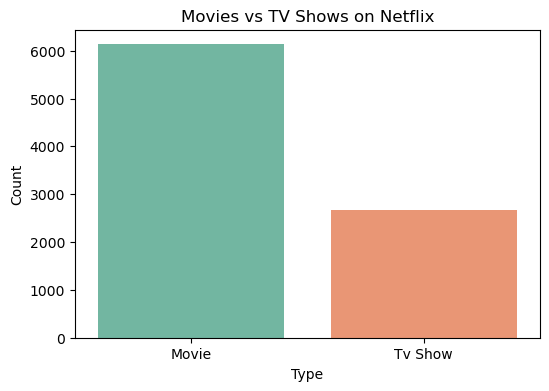

In [50]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [51]:
df["country"].value_counts()

country
United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [52]:
# Top 10 countries
top_countries = df['country'].value_counts().head(10)
print(top_countries)

country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


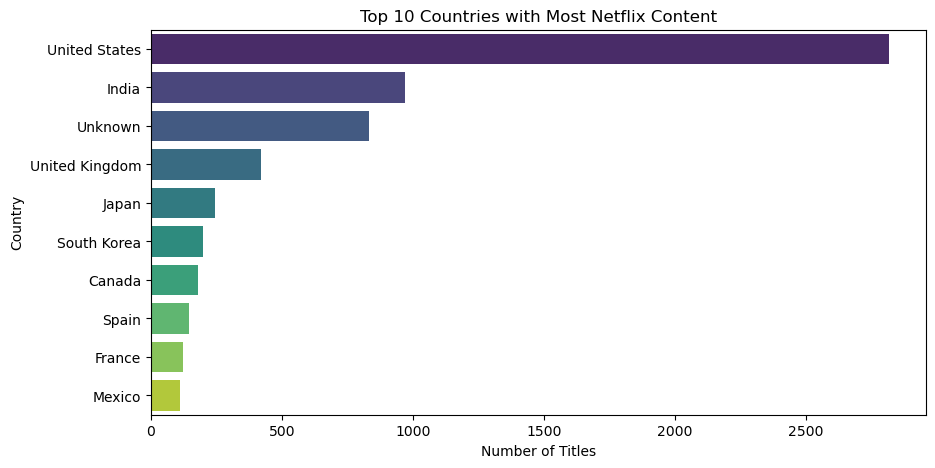

In [53]:
# Barplot
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

In [56]:
df["release_year"].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

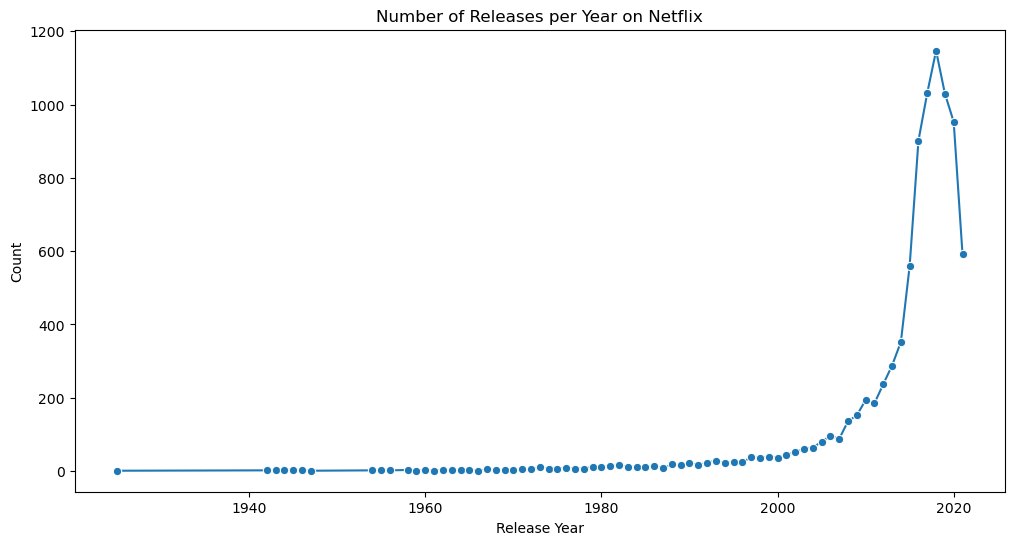

In [60]:
# Releases per year
releases_per_year = df['release_year'].value_counts()

plt.figure(figsize=(12,6))
sns.lineplot(x=releases_per_year.index, y=releases_per_year.values, marker='o')
plt.title("Number of Releases per Year on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

Top Directors:
 director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: count, dtype: int64


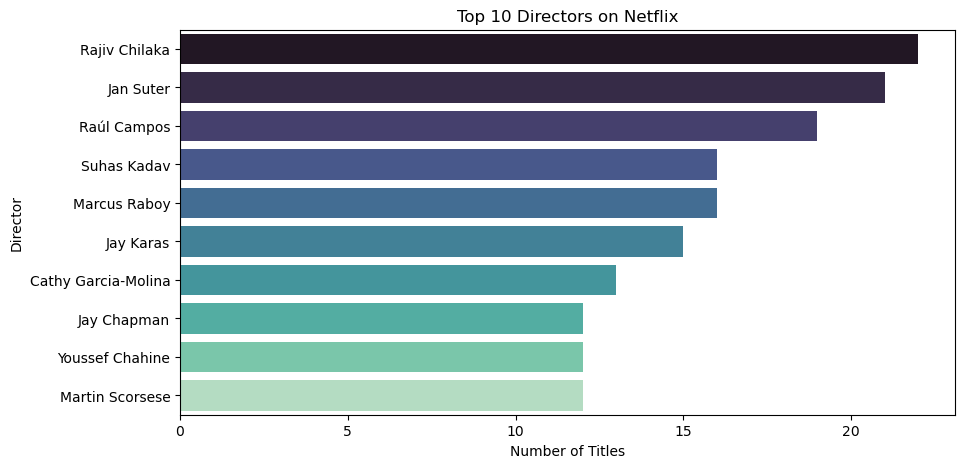

Top Actors:
 cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64


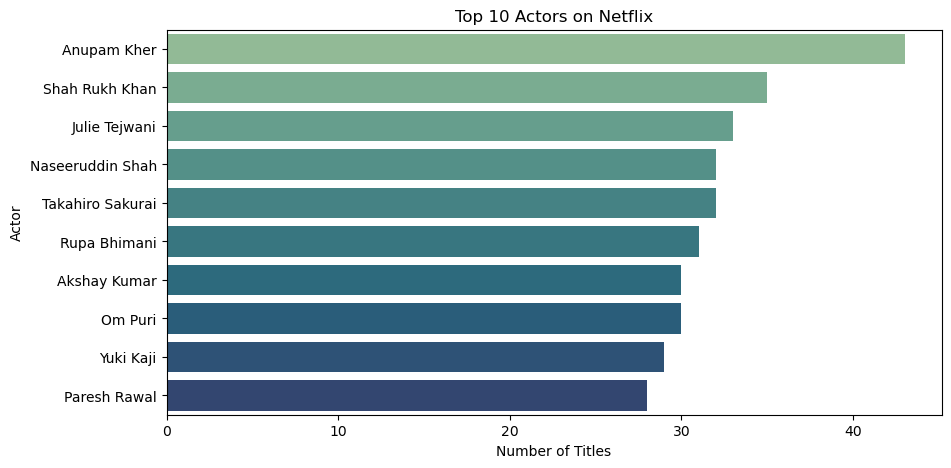

In [64]:
# Top 10 Directors (excluding 'Unknown' or empty)
top_directors = (df['director'].dropna().str.split(',').explode().str.strip())
top_directors = top_directors[top_directors.str.lower() != 'unknown']
top_directors = top_directors.value_counts().head(10)

print("Top Directors:\n", top_directors)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="mako")
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


# Top 10 Actors (excluding 'Unknown' or empty)
top_actors = (df['cast'].dropna().str.split(',').explode().str.strip())
top_actors = top_actors[top_actors.str.lower() != 'unknown']
top_actors = top_actors.value_counts().head(10)

print("Top Actors:\n", top_actors)

plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="crest")
plt.title("Top 10 Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()


Top Genres:
 listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


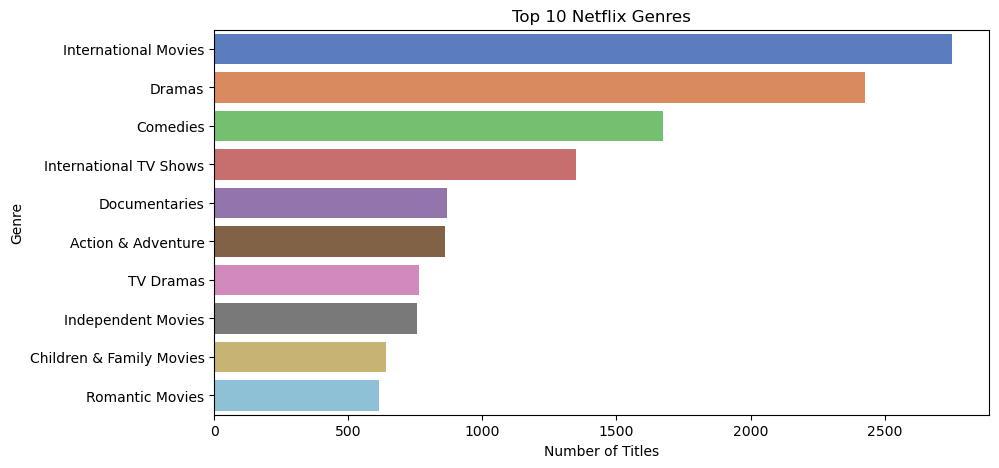

In [66]:
# Top 10 Genres
top_genres = df['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)
print("Top Genres:\n", top_genres)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="muted")
plt.title("Top 10 Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

## 6. SQL Queries on Dataset
We will load the dataset into an **SQLite database** and run queries.  

Example queries:
1. Count the number of Movies vs TV Shows.  
2. Find the top 5 countries with most content.  
3. List all movies released in a specific year (e.g., 2020).  
4. Find shows where director = "Rajiv Chilaka".  
5. Find the most common rating (TV-MA, TV-14, PG, etc.).  

In [85]:
# Connect to SQLite database (or create it)
conn = sqlite3.connect("netflix.db")
cursor = conn.cursor()

# Save dataframe to SQL table
df.to_sql("netflix", conn, if_exists="replace", index=False)

8807

In [86]:
#Count the number of Movies vs TV Shows.
query = """
SELECT type, COUNT(*) AS count
FROM netflix
GROUP BY type;
"""
pd.read_sql(query, conn)

,type,count
0,Movie,6131
1,Tv Show,2676


In [87]:
#Find the top 5 countries with most content.
query = """
SELECT country, COUNT(*) AS count
FROM netflix
WHERE country IS NOT NULL AND country != 'Unknown'
GROUP BY country
ORDER BY count DESC
LIMIT 5;
"""
pd.read_sql(query, conn)

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


In [88]:
#List all movies released in a specific year (e.g., 2020).
query = """
SELECT title FROM netflix
WHERE release_year=2020 and type="Movie";
"""
pd.read_sql(query, conn)

,title
0,Dick Johnson Is Dead
1,Europe's Most Dangerous Man: Otto Skorzeny in ...
2,Tughlaq Durbar
3,Omo Ghetto: the Saga
4,Shadow Parties
...,...
512,All the Freckles in the World
513,Ghost Stories
514,#cats_the_mewvie
515,Norm of the North: Family Vacation


In [89]:
#Find shows where director = "Rajiv Chilaka".
query = """
SELECT title FROM netflix
WHERE director LIKE '%Rajiv Chilaka%';
"""
pd.read_sql(query, conn)

,title
0,Chhota Bheem - Neeli Pahaadi
1,Chhota Bheem & Ganesh
2,Chhota Bheem & Krishna: Mayanagari
3,Chhota Bheem & Krishna: Pataliputra- City of t...
4,Chhota Bheem And The Broken Amulet
5,Chhota Bheem And The Crown of Valhalla
6,Chhota Bheem and the Incan Adventure
7,Chhota Bheem and The ShiNobi Secret
8,Chhota Bheem Aur Hanuman
9,Chhota Bheem aur Krishna


In [90]:
#Find the most common rating (TV-MA, TV-14, PG, etc.).
query = """
SELECT rating, COUNT(*) AS count
FROM netflix
WHERE rating IS NOT NULL AND rating != 'Unknown'
GROUP BY rating
ORDER BY count DESC
LIMIT 5;
"""
pd.read_sql(query, conn)

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490


## 7. Data Visualization
- **Bar plot** → Movies vs TV Shows count.  
- **Heatmap** → Missing values.  
- **Line chart** → Number of releases per year.  
- **Histogram** → Content ratings distribution.  

<Figure size 640x480 with 0 Axes>

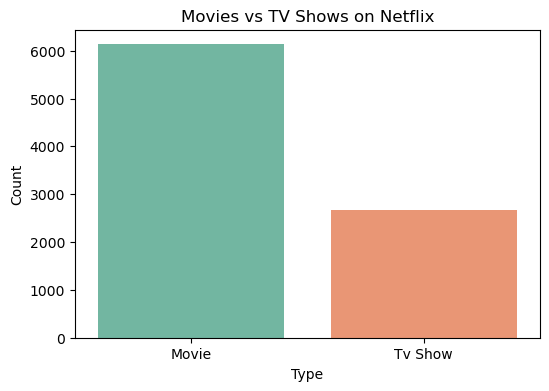

In [103]:
#Bar plot
fig=plt.figure()
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

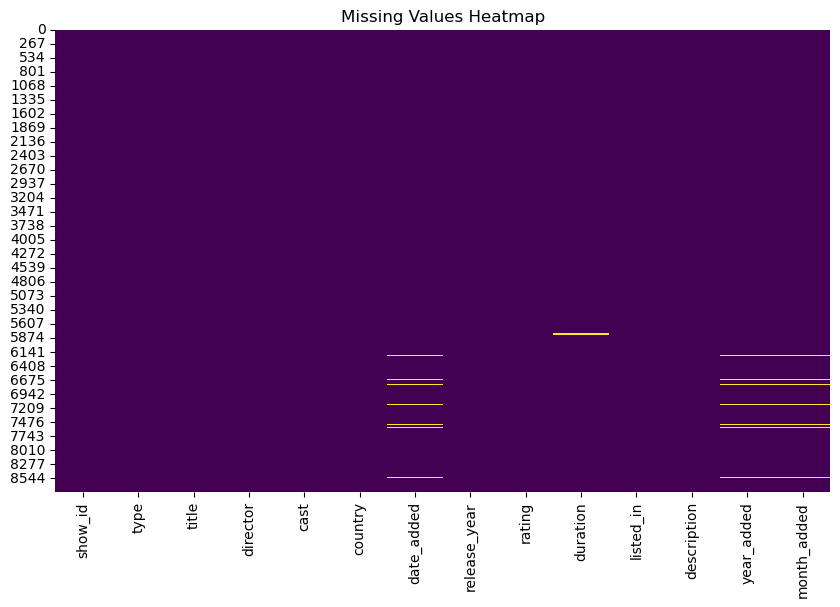

In [104]:
#HeatMap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

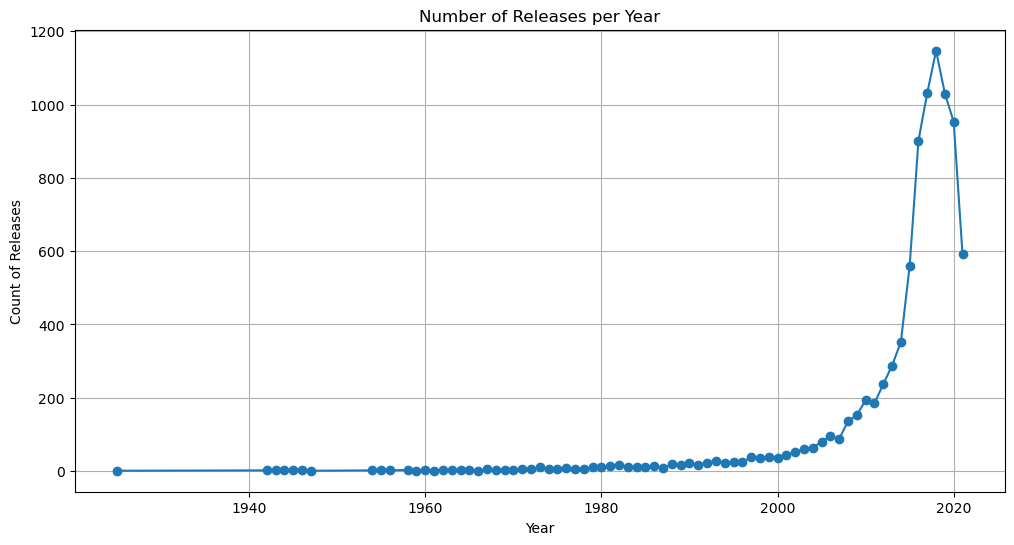

In [105]:
#Line Chart
# Extract year from 'release_year' column
release_trend = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(release_trend.index, release_trend.values, marker='o')
plt.title("Number of Releases per Year")
plt.xlabel("Year")
plt.ylabel("Count of Releases")
plt.grid(True)
plt.show()

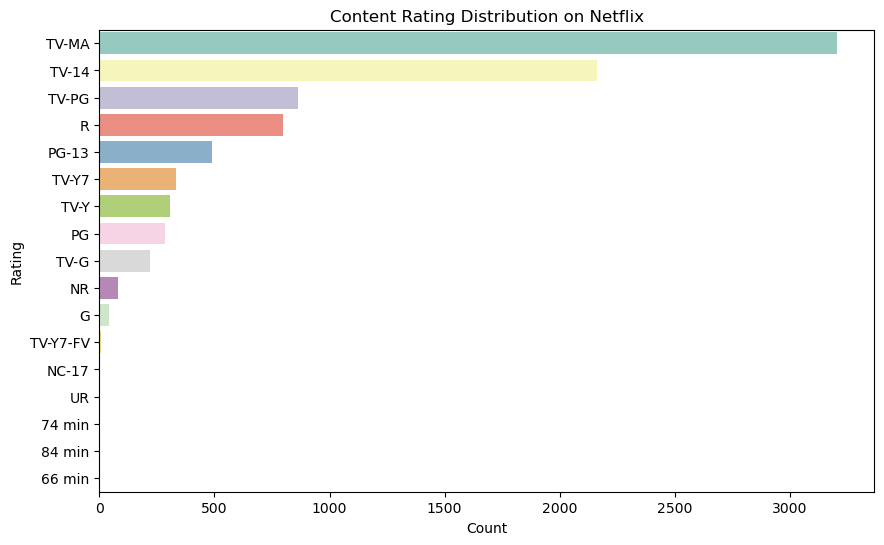

In [106]:
#Histogram → Content ratings distribution.
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="rating", order=df['rating'].value_counts().index, palette="Set3")
plt.title("Content Rating Distribution on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

## 8. Key Insights & Conclusion

Based on our **SQL queries** and **Exploratory Data Analysis (EDA)**, we can highlight the following insights:

### 1. Movies vs TV Shows
- Netflix has significantly **more Movies than TV Shows**.  
- This shows that movies dominate the platform’s catalog, but TV shows have been growing in recent years.  

### 2. Growth Trend Over Time
- Number of releases increased sharply after **2015**, peaking around **2018–2020**.  
- After 2020, there is a slight decline, possibly due to **pandemic production delays**.  

### 3. Geographic Trends
- The **United States** produces the largest number of Netflix titles.  
- **India** ranks second, showing Netflix’s strong global expansion.  

### 4. Popular Genres
- Most common genres include **International Movies**, **Dramas**, and **Comedies**.  
- The Word Cloud visualization highlights Netflix’s focus on **global and diverse content**.  

### 5. Content Ratings
- The most frequent rating is **TV-MA**, indicating a majority of Netflix content is targeted at **mature audiences**.  
- Other common ratings: **TV-14** and **PG**.  

---

### 📌 Conclusion
Netflix’s catalog is **movie-heavy** but TV shows are steadily growing.  
The platform has seen **massive expansion post-2015**, with strong contributions from the **US and India**.  
Genres and ratings reflect a focus on **international and mature content**, aligning with global demand trends.  

---